<a href="https://colab.research.google.com/github/BrunoAzambuja/Classificacao_deteccao_de_fraude_em_cartoes_de_credito/blob/main/Classifica%C3%A7%C3%A3o_detec%C3%A7%C3%A3o_de_fraude_em_cart%C3%B5es_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito
#### Modelos de classificação aplicados aos dados de uma empresa de cartões de crédito.

*by [Bruno Azambuja](www.brunoazambuja.com)*


<p align=center>
<img src="https://img.freepik.com/vetores-gratis/seguranca-global-de-dados-seguranca-de-dados-pessoais-ilustracao-do-conceito-on-line-de-seguranca-de-dados-ciberneticos-seguranca-da-internet-ou-privacidade-e-protecao-de-informacoes_1150-37350.jpg?size=626&ext=jpg&ga=GA1.2.1955465933.1669992464&semt=sph" width="60%"></p>

Neste projeto iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

Dentro dessas fraudes, aquelas envolvendo cartões de crédito são de grande relevância, uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Premissas estabelecidas para o projeto

Neste projeto, como já introduzimos, iremos desenvolver um modelo classificador para detecção de fraude em cartões de crédito usando modelos de machine learning.

Além disso, veremos quais insights podem ser extraídos a partir deste estudo.

Primeiramente estes dados serão tratados, e na sequência, serão desenvolvidos modelos de *Machine Learning* (Regressão Logística, Decision Tree e KNN), realizando-se a comparação entre eles, assim como a avaliação de desempenho destes modelos.



## Importando os dados



Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito, sendo possível acessar e fazer download destes dados na página do [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud); nele se tem acesso aos dados abertos ao público que tem interesse em utilizá-los.

<center><img alt = "Colaboratory logo" width = "20%" src = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png"></center>

O *dataset* utilizado representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como se pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por [V1, V2, V3..., V28].

Na página original dos dados, também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas [V1, V2, V3..., V28].

In [ ]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

In [ ]:
# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto Original:  (284807, 31)
Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar o modelo de *Machine Learning*.

Lembrando que foi realizado o *split* dos conjuntos para evitar o vazamento de dados. Feito isso, vamos à Análise Exploratória.

## Insights: análise exploratória

Apenas olhando as cinco primeiras entradas é possível tirar algumas conclusões:

* As 5 primeiras entradas permitem entender como a transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, [clique neste *link*](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf);

* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original;

* A variável alvo está representada na coluna `Class`, onde: **0** Transação normal e **1** Transação fraudulenta.

In [ ]:
# ver as primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Verificando abaixo o resumo estatístico, por meio do método describe(), podemos confirmar que as variáveis relativas aos componentes principais (transformação PCA) não têm nenhuma discrepância aparente, bem como a coluna Time.

Em relação à variável Amount, nota-se que o valor médio de transações (considerando ambas as classes) é 88.61, mediana igual a 22.00 e desvio padrão de 247.65. Atingindo o valor máximo de 19656.53, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado.

In [ ]:
# ver o resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


Quanto à qualidade do dataset, este não apresentou nenhum valor ausente ou que demandasse uma etapa de limpeza. Na função abaixo, perceba que a soma do valores nulos por coluna é zero, o que confirma que não há valores ausentes.

In [ ]:
# ver se há valores ausentes
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Como é [informado na descrição dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), as entradas relativas à transações fraudulentas correspondem a 0,17% do total.

O gráfico de barras mostra como essa discrepância se torna nítida e visível. Isso significa que os dados são altamente desequilibrados em relação à variável de destino Class.

Na prática, isso interfere no desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

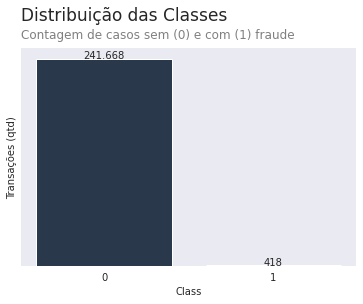

In [ ]:
# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax, color = "#253750")
ax.set_title('Distribuição das Classes', fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Contagem de casos sem (0) e com (1) fraude", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo labels
plt.ylabel('Transações (qtd)')

#plotado gráfico
plt.plot();

Plotou-se também dois gráficos, a fim de comparar as distribuições das duas `class` (fraude e normal) ao longo da dimensão tempo vs número de transações.

Podemos argumentar que as transações fraudulentas são distribuídas de forma mais uniforme, enquanto as transações normais têm uma distribuição cíclica. Isso pode facilitar a detecção de uma transação fraudulenta em um horário 'fora de pico'.

Agora vamos ver se o valor da transação difere entre os dois tipos.

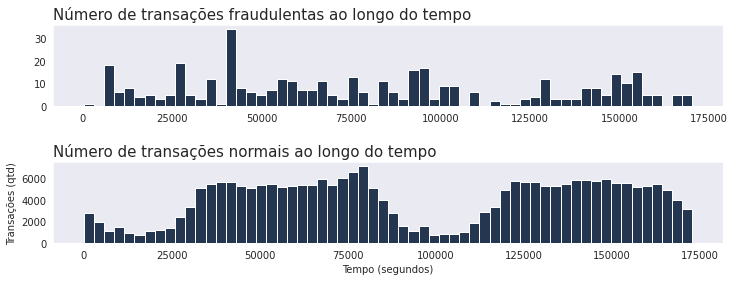

In [ ]:
# gerando figuras
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(12,4))

# definindo número de bins
bins = 60

# gerando primeiro gráfico
ax1.hist(df.Time[df.Class == 1], bins = bins, color = "#253750")
ax1.set_title('Número de transações fraudulentas ao longo do tempo', fontsize=15, loc="left")

# gerando segundo gráfico
ax2.hist(df.Time[df.Class == 0], bins = bins, color = "#253750")
ax2.set_title('Número de transações normais ao longo do tempo', fontsize=15, loc="left")

# definindo labels
plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações (qtd)')

# ajustando espaçamento entre gráficos
plt.subplots_adjust(hspace=0.7) 

# plotando o gráfico
fig.tight_layout() 

Seguindo a análise exploratória, foram plotados dois gráficos em que conseguimos visualizar a distribuição dos valores dos tipos de transações. Agora podemos ver se o valor da transação difere entre as transações fraudulentas e normais. 

A maioria das transações são de pequenas quantias. Já as transações fraudulentas têm um valor máximo muito menor que as transações normais.

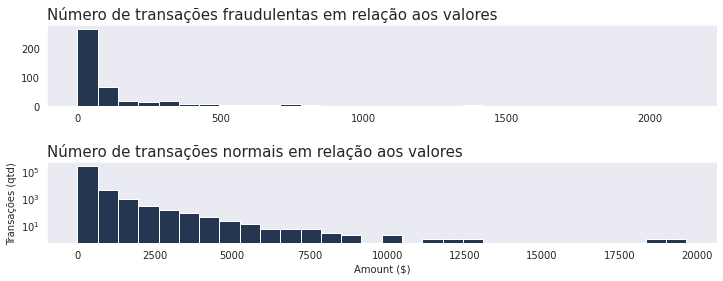

In [ ]:
# gerando figuras
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(12,4))

# definindo número de bins
bins = 30

# gerando primeiro gráfico
ax1.hist(df.Amount[df.Class == 1], bins = bins, color = "#253750")
ax1.set_title('Número de transações fraudulentas em relação aos valores', fontsize=15, loc="left")

# gerando segundo gráfico
ax2.hist(df.Amount[df.Class == 0], bins = bins, color = "#253750")
ax2.set_title('Número de transações normais em relação aos valores', fontsize=15, loc="left")

# definindo labels
plt.xlabel('Amount ($)')
plt.ylabel('Transações (qtd)')
plt.yscale('log')

# ajustando espaçamento entre gráficos
plt.subplots_adjust(hspace=0.7) 

# plotando o gráfico
fig.tight_layout() 

Seguindo a análise exploratória, plotou-se dois gráficos de dispersão a fim de analisar se há alguma diferença no padrão das transações ao longo do tempo em relação à dimensão `Amount`.

Como pode ser visto, as transações fraudulentas e normais estão ocorrendo de forma bastante aleatória ao longo do tempo.

Também podemos observar que não há transações fraudulentas acima de 2500.


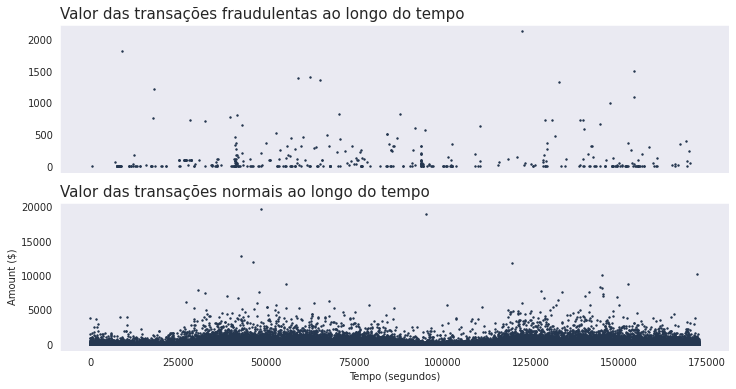

In [ ]:
# gerando figuras
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

# gerando primeiro gráfico
ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1], color = "#253750", s=2)
ax1.set_title('Valor das transações fraudulentas ao longo do tempo', fontsize=15, loc="left")

# gerando segundo gráfico
ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0], color = "#253750", s=2)
ax2.set_title('Valor das transações normais ao longo do tempo', fontsize=15, loc="left")

# definindo labels
plt.xlabel('Tempo (segundos)')
plt.ylabel('Amount ($)')

# ajustando espaçamento entre gráficos
plt.subplots_adjust(hspace=0.2) 

# plotando o gráfico
fig.tight_layout() 

Outro ponto interessante à ser tratado nesta análise exploratória, é o gráfico de densidade que é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

Por outro lado, variáveis como por exemplo `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

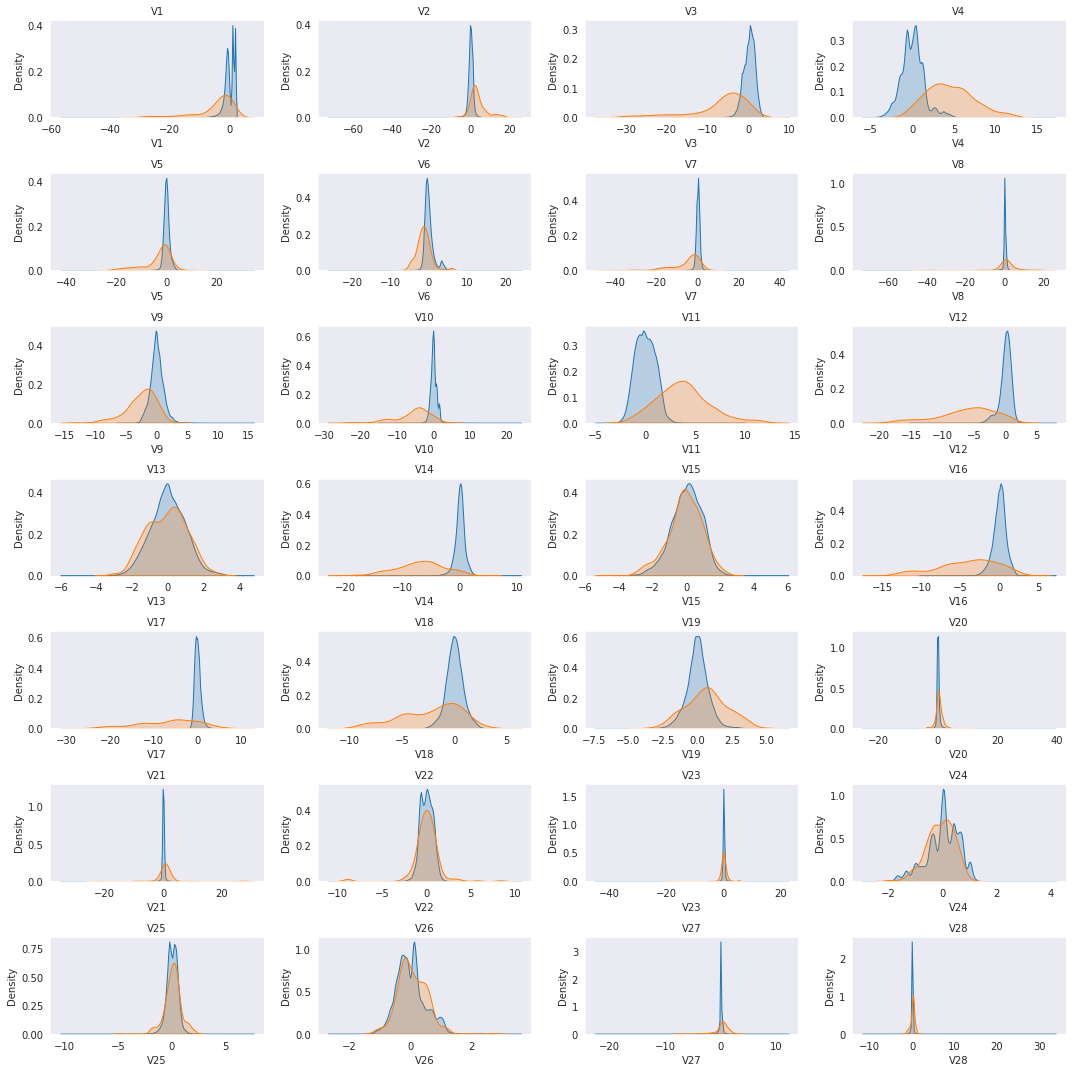

In [ ]:
# organizando dados
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

# gerando gráfico
fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(15,15))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)

# plotando gráfico
plt.tight_layout()

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais;
* Não existem valores ausentes ou nulos no *dataframe*;
* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa de que as *features* originais foram padronizadas;
* O número de transações normais ao longo do tempo, assim o valor máximo das transações fraudulentas, apresentam um padrão de comportamento; 
* As colunas `Time` e `Amount` não estão normalizadas.

## Preparando os dados para os modelos

Para que os dados possam alimentar os modelos de Machine Learning que iremos construir, nesta etapa de preparação vamos desenvolver os seguintes etapas:

* Padronizar as *features* `Time` e `Amount`, que estão em outra ordem de grandeza;
* Dividir entre dados de treino e teste;
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e *overfitting*.

**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers*, será usada a padronização por meio da classe `StandardScaler`.

In [ ]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

# padronizando valores e substuindo nomes das colunas
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

# removendo colunas descontinuadas
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


**Dividir entre conjuntos de Treino e Validação**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre Treino e Validação. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de Treino e Validação tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=True`.

In [ ]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

**Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.

É fácil notar que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).

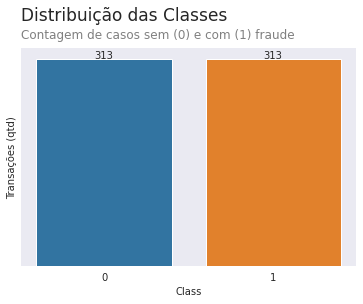

In [ ]:
# usando técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot(y_rus)
ax.set_title('Distribuição das Classes', fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Contagem de casos sem (0) e com (1) fraude", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo labels
plt.ylabel('Transações (qtd)')

#plotado gráfico
plt.plot();

Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

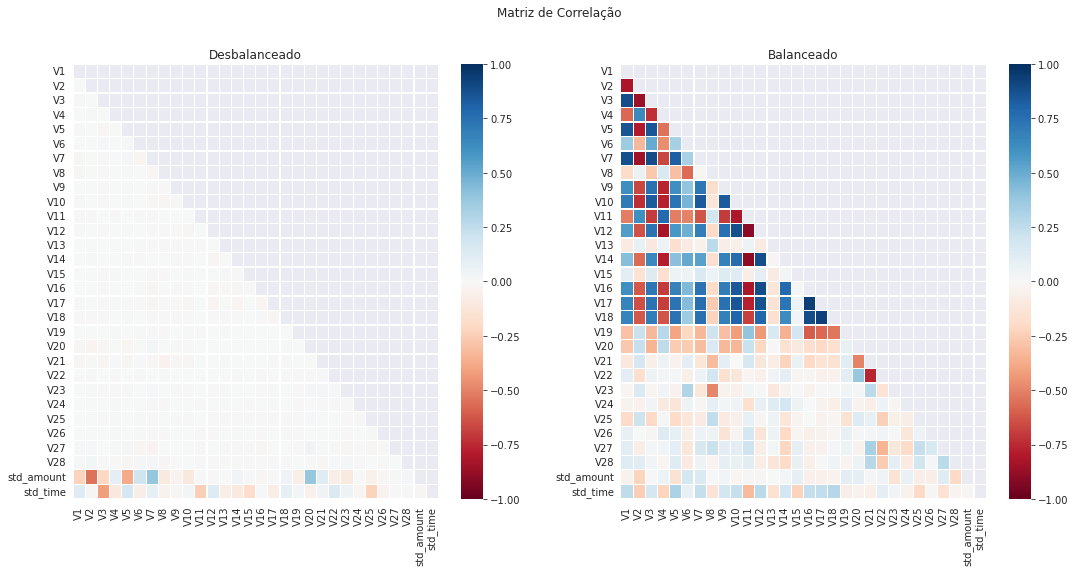

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

# gerando as figuras
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

# definindo parâmetros do gráfico
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# gerando a primeira matrix de correlação
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap='RdBu', fmt='.2f', mask=mask, ax=ax[0], vmax=1, vmin=-1)
ax[0].set_title('Desbalanceado')

# gerando a segunda matrix de correlação
sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap='RdBu', fmt='.2f', mask=mask, ax=ax[1], vmax=1, vmin=-1)
ax[1].set_title('Balanceado')

# plotando os gráficos
plt.show()

## Construção de modelos de Machine Learning


Para este estudo foram desenvolvidos três tipos de modelo de **classificação**: Regressão Logística, Decision Tree e KNN.

#####**Regressão Logística**

Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model_LR = LogisticRegression()
model_LR.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred_LR = model_LR.predict(X_val)
y_proba_LR = model_LR.predict_proba(X_val)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho nos dados de validação.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada. Como expliquei [neste artigo](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes.

Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna *recall* do Relatório de Classificação. 

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. No caso desse modelo de Regressão Logística, tem-se 92,7% de AUC.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9698    0.9846     60417
           1     0.0485    0.8857    0.0920       105

    accuracy                         0.9697     60522
   macro avg     0.5242    0.9278    0.5383     60522
weighted avg     0.9981    0.9697    0.9830     60522

Acurácia: 0.9697

AUC: 0.9278



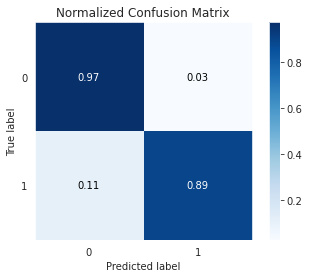

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_LR, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_LR, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_LR)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_LR)))

#####**Decision Tree**

Com todos os dados preparados e após uma análise exploratória completa, agora irei construir um classificador usando Decision Tree.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [ ]:
# instanciar e escolher os hyperparameters
model_DT =DecisionTreeClassifier(max_features=8 , max_depth=6)

# treinar o modelo
model_DT.fit(X_rus , y_rus)

# fazer as previsões em cima dos dados de teste
y_pred_DT = model_DT.predict(X_val)
y_proba_DT = model_DT.predict_proba(X_val)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho nos dados de validação.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9718    0.9856     60417
           1     0.0512    0.8762    0.0967       105

    accuracy                         0.9716     60522
   macro avg     0.5255    0.9240    0.5412     60522
weighted avg     0.9981    0.9716    0.9840     60522

Acurácia: 0.9716

AUC: 0.9240



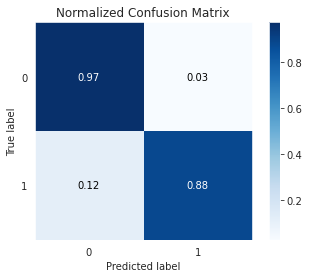

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_DT, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_DT, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_DT)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_DT)))

#####**KNN**

Com todos os dados preparados e após uma análise exploratória completa, agora irei construir um classificador usando KNN.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [ ]:
# instanciar e escolher os hyperparameters
model_KNN = KNeighborsClassifier(n_neighbors=7)

# treinar o modelo
model_KNN.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred_KNN = model_KNN.predict(X_val)
y_proba_KNN = model_KNN.predict_proba(X_val)

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho nos dados de validação.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9825    0.9911     60417
           1     0.0801    0.8762    0.1468       105

    accuracy                         0.9823     60522
   macro avg     0.5400    0.9294    0.5690     60522
weighted avg     0.9982    0.9823    0.9896     60522

Acurácia: 0.9823

AUC: 0.9294



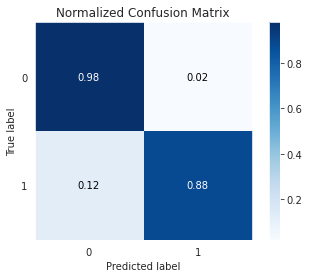

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_KNN, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred_KNN, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred_KNN)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred_KNN)))

#####**Comparação dos modelos**

Para facilitar a comparação entre os modelos, criei um dicionário para armazenar os resultados dos diferentes modelos construídos.

In [ ]:
# gerando a base de dados
model_comparison={}
model_comparison['Regressão Logística']=[accuracy_score(y_val,y_pred_LR), f1_score(y_val,y_pred_LR,average='weighted'), roc_auc_score(y_val, y_pred_LR), recall_score(y_val,y_pred_LR,average='weighted')]
model_comparison['Decision Tree']=[accuracy_score(y_val,y_pred_DT), f1_score(y_val,y_pred_DT,average='weighted'), roc_auc_score(y_val, y_pred_DT), recall_score(y_val,y_pred_DT,average='weighted')]
model_comparison['KNN']=[accuracy_score(y_val,y_pred_KNN), f1_score(y_val,y_pred_KNN,average='weighted'), roc_auc_score(y_val, y_pred_KNN), recall_score(y_val,y_pred_KNN,average='weighted')]

In [ ]:
# gerando a tabela de comparação
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score', 'AUC ROC', 'Recall Scorre']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=True)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,AUC ROC,Recall Scorre
Regressão Logística,96.97%,98.30%,92.78%,96.97%
Decision Tree,97.16%,98.40%,92.40%,97.16%
KNN,98.23%,98.96%,92.94%,98.23%


## Avaliação de desempenho dos modelos

No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste.

Agora que já exploramos e preparamos os dados, instanciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial desses modelos com os dados de teste.

O que faremos é apenas utilizar os modelos que treinamos com um novo conjunto. Mas, para que os resultados sejam justos, precisamos fazer com que os novos dados estejam nas mesmas condições daqueles que o nosso modelo espera.

Nesse caso, precisamos padronizar as colunas Time e Amount. Não podemos balancear os dados pois haveria perda. Nosso modelo precisa ser tratado, mas precisamos fazer previsões em todas as linhas que ele receber.


In [ ]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Agora basta separar entre X e Y, e fazer nossas previsões.

In [ ]:
# separar variáveis entre X e y
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

#####**Regressão Logística**

Com os dados de `test` preparados vamos fazer as previsões da Regressão Logística.

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred_LR = model_LR.predict(X_test)

Pronto! Com nossas previsões feitas, é hora de visualizar os resultados.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9721    0.9858     42647
           1     0.0548    0.9324    0.1036        74

    accuracy                         0.9721     42721
   macro avg     0.5274    0.9523    0.5447     42721
weighted avg     0.9982    0.9721    0.9843     42721

Acurácia: 0.9721

AUC: 0.9523



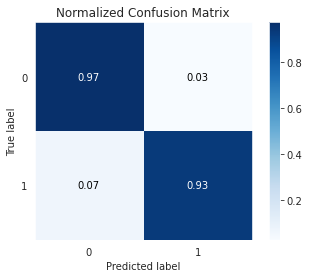

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_LR, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_LR, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_LR)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_LR)))

Podemos ver que nossos resultados da Regressão Logística foram muito próximos ao do conjunto de validação, o que é um excelente resultado!

#####**Decision Tree**

Com os dados de `test` preparados vamos fazer as previções de Decision Tree.

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred_DT = model_DT.predict(X_test)

Pronto! Com nossas previsões feitas, é hora de visualizar os resultados.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9716    0.9855     42647
           1     0.0509    0.8784    0.0962        74

    accuracy                         0.9714     42721
   macro avg     0.5253    0.9250    0.5408     42721
weighted avg     0.9981    0.9714    0.9839     42721

Acurácia: 0.9714

AUC: 0.9250



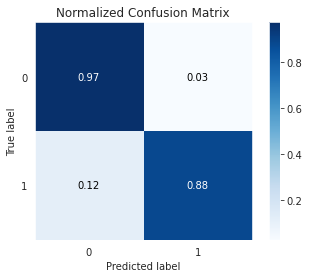

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_DT, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_DT, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_DT)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_DT)))

Podemos ver que nossos resultados de Decision Tree foram muito próximos ao do conjunto de validação, o que é um excelente resultado!

#####**KNN**

Com os dados de `test` preparados vamos fazer as previções da KNN.

In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred_KNN = model_KNN.predict(X_test)

Pronto! Com nossas previsões feitas, é hora de visualizar os resultados.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9838    0.9917     42647
           1     0.0883    0.9054    0.1609        74

    accuracy                         0.9836     42721
   macro avg     0.5441    0.9446    0.5763     42721
weighted avg     0.9983    0.9836    0.9903     42721

Acurácia: 0.9836

AUC: 0.9446



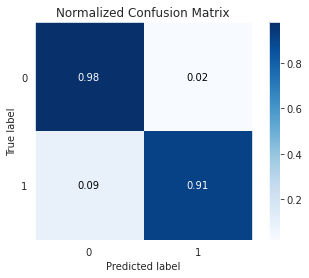

In [ ]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_KNN, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_KNN, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_KNN)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_KNN)))

Podemos ver que nossos resultados de KNN também foram muito próximos ao do conjunto de validação, o que é um excelente resultado!

#####**Comparação dos modelos**

Para facilitar a comparação entre os modelos, criei um dicionário para armazenar os resultados dos diferentes modelos construídos.

In [ ]:
# gerando a base de dados
model_comparison={}
model_comparison['Regressão Logística']=[accuracy_score(y_test,y_pred_LR), f1_score(y_test,y_pred_LR,average='weighted'), roc_auc_score(y_test, y_pred_LR), recall_score(y_test,y_pred_LR,average='weighted')]
model_comparison['Decision Tree']=[accuracy_score(y_test,y_pred_DT), f1_score(y_test,y_pred_DT,average='weighted'), roc_auc_score(y_test, y_pred_DT), recall_score(y_test,y_pred_DT,average='weighted')]
model_comparison['KNN']=[accuracy_score(y_test,y_pred_KNN), f1_score(y_test,y_pred_KNN,average='weighted'), roc_auc_score(y_test, y_pred_KNN), recall_score(y_test,y_pred_KNN,average='weighted')]

In [ ]:
# gerando a tabela de comparação
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score', 'AUC ROC', 'Recall Scorre']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=True)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,AUC ROC,Recall Scorre
Decision Tree,97.14%,98.39%,92.50%,97.14%
Regressão Logística,97.21%,98.43%,95.23%,97.21%
KNN,98.36%,99.03%,94.46%,98.36%


## Conclusão


Como se pode observar, não se trata de um problema trivial. Apesar de os dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, o desbalanceamento e a transformação PCA demandaram um trabalho considerável.

A comparação entre diversos modelos torna-se interessante na medida em que se obtém resultados com melhor desempenho, gerando resultados um pouco melhores que os anteriores. Esta diferença já representa uma economia de milhões de reais conforme já introduzido neste notebook.

O estudo atendeu de forma satisfatória os objetivos propostos nas premissas deste trabalho. Obviamente, apesar do bom resultado final, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.